В этом блокноте рассматривается базовый инструментарий для работы со случайными величинами.

Для успешного освоения этого материала необходимо

1) прослушать и проработать лекцию по теме "Случайные величины" (вторая лекция курса);

2) изучить презентацию "Основные законы распределения", размещенную в системе LMS.


Сначала загрузим все необходимые для работы библиотеки:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

# Краткая справка о модуле *stats* библиотеки *SciPy*
Библиотека *SciPy* это библиотека Python с открытым исходным кодом, предназначенная для выполнения научных и инженерных расчётов. Она построена на базе *NumPy*.

Модуль *stats* содержит классы и методы для работы со случайными величинами с различными дискретными и непрерывными законами распределения, а также некоторые статистические методы.

Полное описание доступно по [ссылке](https://docs.scipy.org/doc/scipy/reference/stats.html).


## Общий принцип работы с модулем `scipy.stats`

Все классы, реализующие конкретные законы распределения, являются подклассами одного из двух классов: **rv_continuous** и **rv_discrete** (для работы с непрерывными и дискретными случайными величинами соответственно) и наследуют методы, реализованные в своем родительском классе.

Для работы с конкретным законом распределения необходимо создать экземпляр соответствующего класса и далее использовать методы этого класса.

Пусть `X` — класс, реализующий некоторый закон распределения случайной величины $X$.    

Конкретное распределение с параметрами `params` можно получить как `X(params)`. У него доступны следующие методы:


* `X(params).rvs(size=n)` — генерация массива-выборки размера $n$ (*rvs* - **r**andom **v**ariate**s**)
* `X(params).cdf(x)` — значение функции распределения $F(x)$ в точке $x$ (*cdf* - **c**umulative **d**istribution **f**unction)
* `X(params).ppf(p)` — квантиль $x_p$ порядка $p$ (*ppf* - **p**ercent **p**oint **f**unction)
* `X(params).mean()` — математическое ожидание $M(X)$
* `X(params).var()` — дисперсия $D(X)$ (*var* - **var**iance)
* `X(params).std()` — среднее квадратическое (стандартное) отклонение $\sigma(X)$ (*std* - **st**andard **d**eviation)

Кроме того для непрерывных распределений
* `X(params).pdf(x)` — значение функции плотности $f(x)$ в точке $x$ (*pdf* - **p**obability **d**ensity **f**unction)

а для дискретных
* `X(params).pmf(x)` — значение вероятности $P(X=x)$ случайной величине $X$ принять значение $x$ (*pmf* - **p**robability **m**ass **f**unction)

Все перечисленные выше методы применимы как к конкретному распределению `X(params)`, так и к самому классу `X`.    
Во втором случае параметры передаются в сам метод. Например, вызов `X.rvs(size=N, params)` эквивалентен `X(params).rvs(size=N)`.   

При работе с распределениями и случайными величинами рекомендуется использовать первый способ (обращение к конкретному распределению), поскольку он более соответствует математическому синтаксису теории вероятностей.

Параметры могут быть следующими:
* `loc` — параметр сдвига;
* `scale` — параметр масштаба;
* и другие параметры (например, $n$ и $p$ для биномиального закона распределения).

# Основные законы распределения дискретных и непрерывных случайных величин

## Законы распределения дискретных случайных величин

### Биномиальное распределение
Для создания случайной величины, имеющей биномиальное распределение с параметрами $n$ и $p$, используется класс `scipy.stats.binom(n, p)`.

[Документация класса](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)


### Распределение Пуассона
Для создания случайной величины, имеющей имеющей распределение Пуассона с параметром $a$, используется класс `scipy.stats.poisson(a)`.

[Документация класса](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

## Законы распределения непрерывных случайных величин


### Равномерное распределение
Для создания равномерно распределенной на отрезке $[a,b]$ случайной величины используется класс `scipy.stats.uniform(a, b-a)`.

Обратите внимание, что указываемыми параметрами являются левая граница промежутка и его длина, а не левая и правая границы промежутка.

[Документация класса](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)

### Показательное (экпоненциальное) распределение
Для создания случайной величины, имеющей показательное распределение с параметром $\lambda$, используется класс `scipy.stats.expon(scale=1/lambda)`.

[Документация класса](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)

### Нормальное распределение
Для создания нормально распределенной случайной величины с параметрами $m$ и $\sigma$ используется класс `scipy.stats.norm(m,sigma)`.

Если параметры нормального распределения не указаны, то создается случайная величина со стандартным нормальным законом распределения ($m=0, \sigma=1$).

[Документация класса](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

## Методы для работы со случайными величинами

### Массив из значений случайной величины
Для получения массива из $n$ значений случайной величины используется метод `rvs(n)`.

In [ ]:
# пример: массив из 10 значений случайной величины с показательными распределением с параметром λ = 0.8
lamda = 0.8

# создаем показательно распределенную случайную величину с именем expon_rv - экземпляр класса expon
expon_rv = sts.expon(scale = 1/lamda)

expon_rv.rvs(10)

array([1.95599157, 1.73713418, 0.1878381 , 0.1017927 , 2.6580359 ,
       1.62058821, 1.1412007 , 0.26257633, 0.86332732, 0.35546922])

### Функция распределения
Для вычисления значения функции распределения $F(x)$ в точке $x$ используется метод `cdf(x)`.

**Замечание**

 Метод `cdf(x)` вычисляет значение функции распределения $F(x)$ как вероятность $F(x)=P(X \leqslant x)$, в отличие от показанной на лекции формулы $F(x)=P(X  < x)$. В англоязычной математике используют это определение функции распределения.

Для непрерывных случайных величин $P(X  < x) = P(X \leqslant x)$, но при работе с дискретными случайными величинами нужно учитывать разницу в определениях.

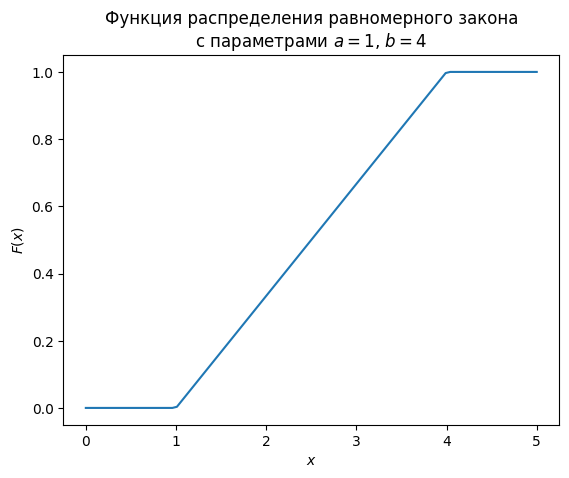

In [ ]:
# пример: построение графика функции распределения равномерно распределенной случайной величины
# с параметрами a = 1 и b = 4
a = 1
b = 4

# создаем равномерно распределенную случайную величину с именем uniform_rv - экземпляр класса uniform
uniform_rv = sts.uniform(a, b-a)

# формируем массив из 100 абсцисс точек в диапазоне от 0 до 5
# (выбор длины диапазона и количества точек зависит от конкретного распределения)
x = np.linspace(0, 5, 100)

# считаем F(x) для каждого x
cdf = uniform_rv.cdf(x) # метод cdf может принимать и массив x

#cтроим график функции распределения
plt.plot(x, cdf)

# добавляем названия для осей и графика
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.title(f'Функция распределения равномерного закона\nс параметрами $a={a}$, $b={b}$')
plt.show()

**Замечание**

Для построения графика функции распределения в случае дискретной случайной величины используйте метод `step` библиотеки *matplotlib*, указав параметр `where='post'`.

[Документация метода](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.step.html)

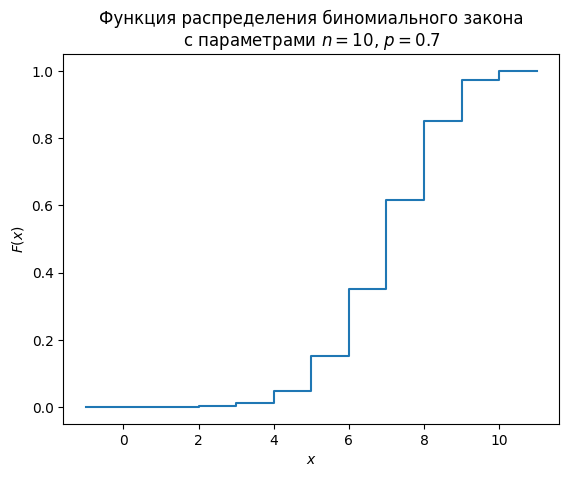

In [ ]:
# пример: построение графика функции распределения дискретной случайной величины с биномиальным распределением
# c параметрами n = 10 и p = 0.7
n = 10
p = 0.7

# создаем случайную величину binomial_rv с биномиальным распределением
binomial_rv = sts.binom(n, p)

# формируем массив из целых значений в диапазоне от -1 до 11
# (выбор длины диапазона и количества точек зависит от конкретного распределения)
x = np.arange(-1, 12)

# считаем F(x) для каждого x
cdf = binomial_rv.cdf(x) # метод cdf может принимать и массив x

#cтроим график функции распределения
plt.step(x, cdf, where='post')

# добавляем названия для осей и графика
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.title(f'Функция распределения биномиального закона\nс параметрами $n={n}$, $p={p}$')
plt.show()

### Плотность распределения
Для вычисления значения функции плотности распределения вероятностей $f(x)$ в точке $x$ используется метод `pdf(x)`.

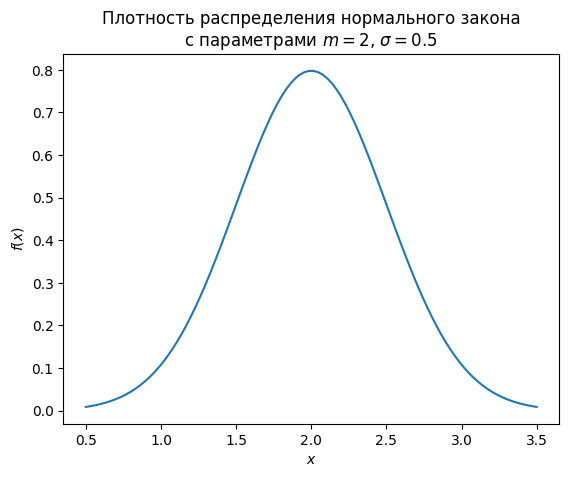

In [ ]:
# пример: построение графика плотности распределения нормально распределеной случайной величины
# с параметрами m = 2 и sigma = 0.5
m = 2
sigma = 0.5

# создаем нормально распределенную случайную величину с именем norm_rv  - экземпляр класса norm
norm_rv = sts.norm(m, sigma)

# формируем массив из 100 абсцисс точек в диапазоне от 0.5 до 3.5
# (выбор длины диапазона и количества точек зависит от конкретного распределения)
x = np.linspace(0.5, 3.5, 100)

# считаем f(x) для каждого x
pdf = norm_rv.pdf(x) # метод pdf может принимать и массив x

#cтроим график плотности распределения
plt.plot(x, pdf)

# добавляем названия для осей и графика
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title(f'Плотность распределения нормального закона\nс параметрами $m={m}$, $\sigma={sigma}$')
plt.show()

### Функция вероятностей
Для дискретных случайных величин используется метод `pmf`, вычисляющий вероятность $P(X=x)$ случайной величине $X$ принять значение $x$.

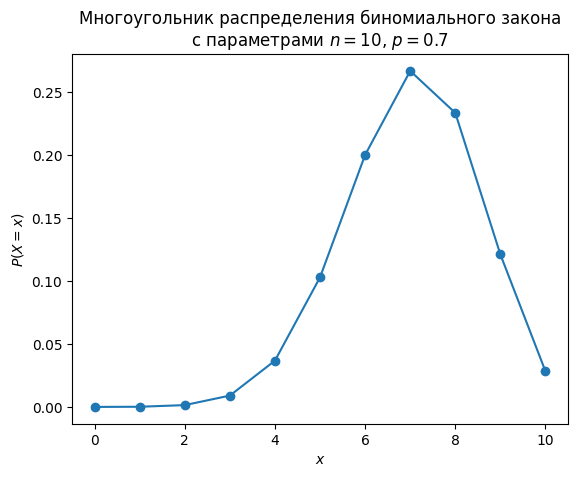

In [ ]:
# пример: построение многоугольника распределения ранее созданной случайной величины с биномиальным распределением

# формируем массив возможных значений случайной величины x = 0, 1, 2, ..., 9, 10
# (выбор длины диапазона и количества точек зависит от конкретного распределения)
x = np.arange(11)

# считаем P(X=x) для каждого x
pmf = binomial_rv.pmf(x) # метод pmf может принимать и массив x

#cтроим многоугольник распределения
plt.plot(x, pmf, 'o-')

# добавляем названия для осей и графика
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')
plt.title(f'Многоугольник распределения биномиального закона\nс параметрами $n={n}$, $p={p}$')
plt.show()

### Основные числовые характеристики
Для вычисления основных числовых характеристик используется метод `stats()`. Метод возвращает кортеж из значений математического ожидания и дисперсии.


Отдельно:
* для вычисления значения математического ожидания $M(X)$ используется метод `mean()`

* для вычисления значения дисперсии $D(X)$ используется метод `var()`

* для вычисления значения среднего квадратического отклонения $\sigma(X)$
 используется метод `std()`

* для вычисления квантиля $x_p$  используется метод `ppf(p)`.     
Для вычисления медианы (второго квартиля) можно отдельно использовать метод `median()`.


In [ ]:
# пример: вычисление математического ожидания, дисперсии и среднего квадратического отклонения
# для ранее созданной случайной величины с равномерным распределением

mean_u, var_u = uniform_rv.stats()

print(f'M(X) = {mean_u}') # или print(f'M(X) = {uniform_rv.mean()}')
print(f'D(X) ≈ {var_u}') # или print(f'D(X) ≈ {uniform_rv.var()}')
print(f'𝜎(X) ≈ {uniform_rv.std():.3f}')

M(X) = 2.5
D(X) ≈ 0.75
𝜎(X) ≈ 0.866


In [ ]:
# пример: вычисление третьего квартиля для ранее созданной случайной величины с равномерным распределением

x_p = uniform_rv.ppf(0.75)
print(f'Третий квартиль равен {x_p}')

Третий квартиль равен 3.25
